<a href="https://colab.research.google.com/github/alinyaraujos/machine-learning/blob/master/ApredizagemDeMaquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart.csv')

In [6]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#verificando se realmente o alvo está divido em duas classes
dados['target'].nunique()

2

In [28]:
#verificando se exitem dados faltantes
dados.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

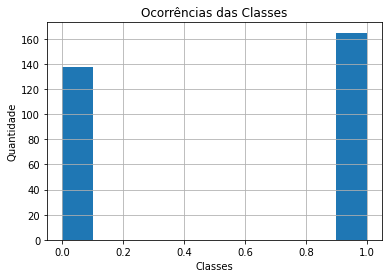

In [9]:
#verificando ocorrência das classes
plt.hist(dados['target'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [10]:
#contando quantidade de occorrencias de cada classe
print('Ausência da doença:',dados[dados['target']==0].shape[0])
print('Presença da doença:',dados[dados['target']==1].shape[0])

Ausência da doença: 138
Presença da doença: 165


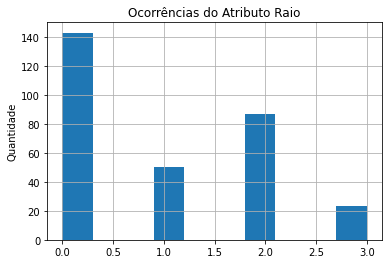

In [13]:
#verificando ocorrências do atributo de tipo de dor no peito (cp)
plt.hist(dados['cp'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo tipo de dor no peito(cp)')
plt.grid(True)
plt.show()

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [25]:
corr = dados.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


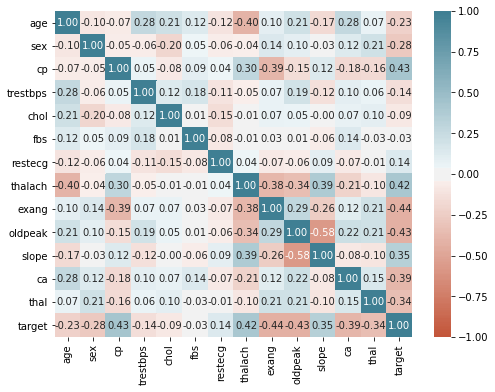

In [39]:
#Não tem muita correlação 
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap=sns.diverging_palette(20, 220, n=200))

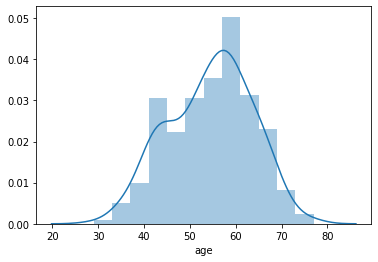

In [20]:
sns.distplot(dados['age'])
#A maioria das pessoas então com idades entre 40 a 60 anos 

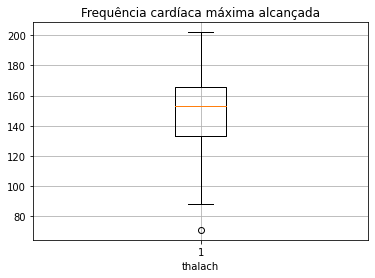

In [55]:
plt.boxplot(dados.thalach)
plt.title('Frequência cardíaca máxima alcançada')
plt.xlabel('thalach')
plt.grid()
plt.show()

In [56]:
target = dados[dados['target']==0].drop(columns=['target']).reset_index(drop=True)

In [57]:
notTarget = dados[dados['target']==1].drop(columns=['target']).reset_index(drop=True)

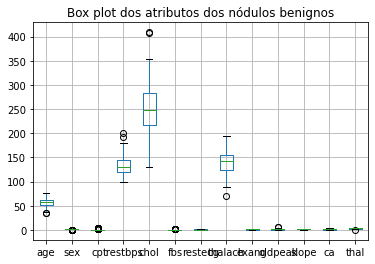

In [58]:
target.boxplot()
plt.title('Box plot dos atributos dos que apresentaram a doença')
plt.show()

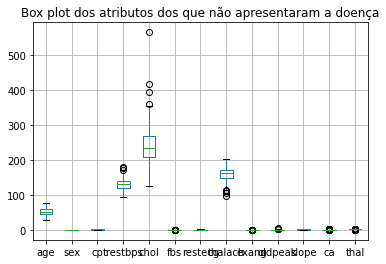

In [60]:
notTarget.boxplot()
plt.title('Box plot dos atributos dos que não apresentaram a doença')
plt.show()

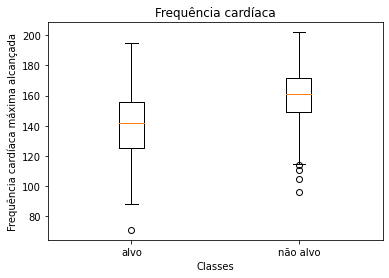

In [64]:

# box plot comparando o perimetro medio para as duas classes
plt.boxplot([target.thalach,notTarget.thalach],labels=['alvo','não alvo'])
plt.xlabel('Classes')
plt.ylabel('Frequência cardíaca máxima alcançada')
plt.title('Frequência cardíaca')
plt.show()

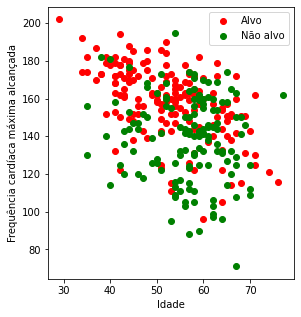

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x=dados.age[dados.target==1],y=dados.thalach[dados.target==1],c='red')
plt.scatter(x=dados.age[dados.target==0],y=dados.thalach[dados.target==0],c='green')
plt.xlabel('Idade')
plt.ylabel('Frequência cardíaca máxima alcançada')
plt.legend(['Alvo','Não alvo'])
